In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('loan_df.csv')
pd.set_option('display.max_columns', None)

In [3]:
loan.dtypes

Unnamed: 0                  int64
loan_amnt                 float64
term_is_36m                 int64
int_rate                  float64
installment               float64
emp_length                  int64
annual_inc                float64
is_default                  int64
dti                       float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
list_status_w               int64
mort_acc                  float64
pub_rec_bankruptcies      float64
verification_encoder      float64
application_encoder       float64
home_ownership_encoder    float64
purpose_encoder           float64
grade_encoder             float64
dtype: object

In [4]:
df = loan[['int_rate', 'total_acc', 'revol_util', 'grade_encoder', 'dti', 'emp_length', 'is_default']]

In [5]:
import feyn
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=42)
train

,int_rate,total_acc,revol_util,grade_encoder,dti,emp_length,is_default
197588,14.59,14.0,73.8,0.288678,17.71,2,0
19176,8.90,20.0,75.1,0.062885,9.08,2,0
378126,23.70,21.0,74.4,0.427916,19.91,10,0
219545,13.98,53.0,54.5,0.211823,23.93,10,0
156715,8.39,12.0,73.3,0.062885,7.30,1,0
...,...,...,...,...,...,...,...
259178,13.35,19.0,57.9,0.211823,10.90,10,0
365838,14.30,26.0,35.6,0.211823,23.83,1,0
131932,19.72,20.0,84.5,0.288678,14.31,10,1
146867,13.99,27.0,28.8,0.211823,26.46,8,1


In [6]:
sample_weights = np.where(train.is_default, 1, .3)


In [7]:
print(train.shape, test.shape)

(297006, 7) (99003, 7)


In [8]:
qlattice = feyn.QLattice()
qlattice.reset(0)

In [9]:
target = 'is_default'
qgraph = qlattice.get_classifier(train, output=target)
qgraph = qgraph.filter(feyn.filters.MaxEdges(5))


In [10]:
updates = 20

for _ in range(updates):
    qgraph.fit(train, threads=6, sample_weights=sample_weights, criterion="aic", n_samples=10000)
    qlattice.update(qgraph.best())

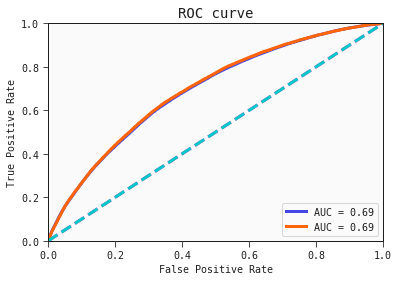

In [11]:
qgraph[0].plot_roc_curve(train)
qgraph[0].plot_roc_curve(test)

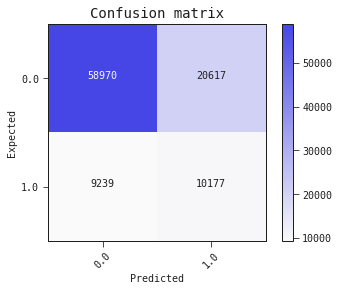

In [12]:
qgraph[0].plot_confusion_matrix(test)